
# EDA (Exploratory Data Analysis)

В этом ноутбуке проводится исследовательский анализ данных (EDA), включающий загрузку, первичную проверку, очистку и визуализацию данных.


## 1. Загрузка и первичный осмотр данных

In [1819]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


In [1820]:
data_yaroslavl = pd.read_csv('cian_playwright.csv')
data_perm = pd.read_csv('cian_playwright_perm.csv')
data_kazan = pd.read_csv('cian_playwright_kazan.csv')
data_mahachkala = pd.read_csv('cian_playwright_mahachkala.csv')
data_moscow = pd.read_csv('cian_playwright_moscow.csv')
data_spb = pd.read_csv('cian_playwright_spb.csv')
data_sochi = pd.read_csv('cian_playwright_sochi.csv')
data_krasnodar = pd.read_csv('cian_playwright_krasnodar.csv')

In [1821]:
data_perm['city'] = 'Пермь'
data_kazan['city'] = 'Казань'
data_mahachkala['city'] = 'Махачкала'
data_sochi['city'] = 'Сочи'
data_krasnodar['city'] = 'Краснодар'

In [1822]:
df = pd.concat([data_yaroslavl, data_perm, data_kazan, data_mahachkala, data_moscow, data_spb, data_sochi, data_krasnodar], ignore_index=True) # объединяем всё в одну таблицу

In [1823]:
df.head()

,offer_id,title,url,price,price_per_sqm,total_meters,rooms_count,floor,floors_count,region,city,district,description,text_len,building_year,building_age,is_completed,area_living,living_share,ceiling_height_m,is_first_floor,is_top_floor,floor_ratio,price_per_room
0,321347074,"1-комн. квартира, 31,3 м², 10/11 этаж",https://yaroslavl.cian.ru/sale/flat/321347074/,6105832.0,195075.0,31.30,1.0,10,11,Ярославская область,Ярославль,р-н Кировский,"Новый жилой комплекс в самом центре Ярославля,...",1020,NaN,NaN,NaN,10.9,0.348243,2.58,0,0,0.909091,6105832.0
1,319294565,"Студия, 21 м², 2/11 этаж",https://yaroslavl.cian.ru/sale/flat/319294565/,4290376.0,204304.0,21.00,0.0,2,11,Ярославская область,Ярославль,р-н Кировский,"Новый жилой комплекс в самом центре Ярославля,...",1020,NaN,NaN,NaN,13.7,0.652381,2.58,0,0,0.181818,0.0
2,322432634,"1-комн. квартира, 33,77 м², 2/17 этаж",https://yaroslavl.cian.ru/sale/flat/322432634/,3208150.0,95000.0,33.77,1.0,2,17,Ярославская область,Ярославль,р-н Дзержинский,"ЖК ""Новое Брагино"" - это современный жилой ком...",769,NaN,NaN,NaN,15.8,0.467871,2.70,0,0,0.117647,3208150.0
3,323149092,"2-комн. квартира, 35,1 м², 3/9 этаж",https://yaroslavl.cian.ru/sale/flat/323149092/,1950000.0,55556.0,35.10,2.0,3,9,Ярославская область,Ярославль,р-н Заволжский,Продаётся двухкомнатная квартира 35 м в Заволж...,2076,1990.0,35.0,1.0,25.8,0.735043,2.60,0,0,0.333333,975000.0
4,315135985,"2-комн. квартира, 49 м², 1/10 этаж",https://yaroslavl.cian.ru/sale/flat/315135985/,4500000.0,91837.0,49.00,2.0,1,10,Ярославская область,Ярославль,р-н Фрунзенский,В прoдaжe прocторная 2х кoмнатнaя кваpтира c р...,532,1976.0,49.0,1.0,NaN,NaN,NaN,1,0,0.100000,2250000.0


## 2. Общая информация о данных

In [1825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   offer_id          9439 non-null   int64  
 1   title             9439 non-null   object 
 2   url               9439 non-null   object 
 3   price             9439 non-null   float64
 4   price_per_sqm     9439 non-null   float64
 5   total_meters      9439 non-null   float64
 6   rooms_count       9349 non-null   float64
 7   floor             9439 non-null   int64  
 8   floors_count      9439 non-null   int64  
 9   region            1418 non-null   object 
 10  city              9439 non-null   object 
 11  district          7109 non-null   object 
 12  description       9439 non-null   object 
 13  text_len          9439 non-null   int64  
 14  building_year     7962 non-null   float64
 15  building_age      7962 non-null   float64
 16  is_completed      7962 non-null   float64


In [1826]:
df.shape

(9439, 24)

In [1827]:
df.columns

Index(['offer_id', 'title', 'url', 'price', 'price_per_sqm', 'total_meters',
       'rooms_count', 'floor', 'floors_count', 'region', 'city', 'district',
       'description', 'text_len', 'building_year', 'building_age',
       'is_completed', 'area_living', 'living_share', 'ceiling_height_m',
       'is_first_floor', 'is_top_floor', 'floor_ratio', 'price_per_room'],
      dtype='object')

## 3. Проверка и заполнение пропусков

In [1829]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.to_frame('missing_values')

,missing_values
region,8021
ceiling_height_m,3257
living_share,2943
area_living,2943
district,2330
building_year,1477
is_completed,1477
building_age,1477
rooms_count,90


In [1830]:
missing_part = (df.isnull().sum() / len(df) * 100).round(2).sort_values(ascending=False)
missing_part = missing_part[missing_part>0]
missing_part.to_frame('Доля пропусков')

,Доля пропусков
region,84.98
ceiling_height_m,34.51
living_share,31.18
area_living,31.18
district,24.68
building_year,15.65
is_completed,15.65
building_age,15.65
rooms_count,0.95


Видим, что пропуски присутствуют в столбцах 'region', 'district', 'building_year', 'building_age', 'is_completed', 'area_living', 'living_share', 'ceiling_height_m'.

Признак «region» можно удалить, так как мы будет сравнивать стоимость по конкретным городам, и регион однозначно восстанавливается через город. А также удалим те признаки, которые не несут никакой информции ('offer_id', 'url') или напрямую определяют целевую переменную ('price_per_sqm', 'price_per_room'). Остальные пропуски постараемся заполнить.

In [1832]:
df.drop(['region', 'offer_id', 'url', 'price_per_sqm', 'price_per_room'], axis=1, inplace=True)

In [1833]:
df_clean = df.copy()

Сначала заполним пропуски в 'rooms_count' медианой. Для этого в кажом городе разделим площадь на категории и для каждой категории определим медианное количество комнат.

In [1835]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='.*observed=False.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, message='.*DataFrameGroupBy.apply operated on the grouping columns.*')
def fill_rooms_count_safe(group):
    
    missing_mask = group['rooms_count'].isna()
    if not missing_mask.any():
        return group
    
    # создаем категории площади
    area_bins = [0, 30, 45, 60, 80, 100, 200, 1000]
    area_labels = ['0-30', '30-45', '45-60', '60-80', '80-100', '100-200', '200+']
    
    group_temp = group.copy()
    group_temp['area_category'] = pd.cut(group_temp['total_meters'], bins=area_bins, labels=area_labels)
    
    # вычисляем медианы по категориям
    median_by_area = group_temp.groupby('area_category')['rooms_count'].median()
    
    for idx in group[missing_mask].index:
        total_meters = group.loc[idx, 'total_meters']
        
        # определяем категорию
        area_cat = None
        for i in range(len(area_bins)-1):
            if area_bins[i] <= total_meters < area_bins[i+1]:
                area_cat = area_labels[i]
                break
        
        if area_cat and area_cat in median_by_area and not pd.isna(median_by_area[area_cat]):
            group.loc[idx, 'rooms_count'] = median_by_area[area_cat]
        else:
            # если нет такой категории, то берём медиану по городу
            group.loc[idx, 'rooms_count'] = group['rooms_count'].median()
    
    return group

df_clean = df_clean.groupby('city').apply(fill_rooms_count_safe).reset_index(drop=True)

Далее заполним пропуски в 'building_year', 'building_age' и 'is_completed' с помощью моды для каждого района каждого города.

In [1837]:
from datetime import datetime

def fill_building_year(group):
    # вычисляем моду в каждом районе
    if group['building_year'].isna().any():
        district_mode = group['building_year'].mode()
        if len(district_mode) > 0 and not pd.isna(district_mode.iloc[0]):
            mode_year = district_mode.iloc[0]
        else:
            # если в районе нет данных, используем медиану по городу
            mode_year = group['building_year'].median()
        
        mask = group['building_year'].isna()
        group.loc[mask, 'building_year'] = mode_year

        current_year = datetime.now().year
        # 'building_age' определяем как разницу между текущим годом и годом строительства
        building_age = current_year - group.loc[mask, 'building_year']
        building_age = building_age.clip(lower=0)
        group.loc[mask, 'building_age'] = building_age
        # 'is_completed' определяем, сравнивая год строительства с текущим годом
        is_completed_bool = group.loc[mask, 'building_year'] < current_year
        group.loc[mask, 'is_completed'] = is_completed_bool.astype(int)  
    
    return group

df_clean = df_clean.groupby(['city', 'district']).apply(fill_building_year).reset_index(drop=True)

Заполняем пропуски в 'area_living', 'living_share'

In [1839]:
# убираем аномально маленькие и большие квартиры
valid_mask = (df_clean['area_living'].notna()) & (df_clean['total_meters'] > 10) & (df_clean['total_meters'] < 500)
valid_data = df_clean[valid_mask]

# вычисляем медианную долю с группировкой по количеству комнат
median_shares = {}
for rooms in sorted(valid_data['rooms_count'].unique()):
    room_data = valid_data[valid_data['rooms_count'] == rooms]
    if len(room_data) > 10:
        median_share = (room_data['area_living'] / room_data['total_meters']).median()
        median_shares[rooms] = np.clip(median_share, 0.5, 0.8)

# заполняем пропуски с учетом количества комнат
missing_mask = df_clean['area_living'].isna()

for idx in df_clean[missing_mask].index:
    rooms = df_clean.loc[idx, 'rooms_count']
    total_meters = df_clean.loc[idx, 'total_meters']
    
    if rooms in median_shares:
        share = median_shares[rooms]
    else:
        # если нет в списке, берём медианную долю по всем данным
        share = (valid_data['area_living'] / valid_data['total_meters']).median()
        share = np.clip(share, 0.5, 0.8)
    
    df_clean.loc[idx, 'area_living'] = total_meters * share
    df_clean.loc[idx, 'living_share'] = share

Заполняем пропуски в 'ceiling_height_m'

In [1841]:
def fill_ceiling_height_simple(group):
    
    missing_mask = group['ceiling_height_m'].isna()
    if not missing_mask.any():
        return group
    
    # определяем период постройки
    def get_building_period(year):
        if year < 1960: return 'до_1960'
        elif year < 1991: return '1960-1990' 
        elif year < 2000: return '1991-2000'
        elif year < 2010: return '2001-2010'
        elif year < 2020: return '2011-2020'
        else: return '2021+'

    temp_df = group.copy()
    temp_df['period'] = temp_df['building_year'].apply(get_building_period)
    
    # вычисляем медианы по периодам
    height_by_period = temp_df.groupby('period')['ceiling_height_m'].median()
    
    for idx in group[missing_mask].index:
        building_year = group.loc[idx, 'building_year']
        period = get_building_period(building_year)
        
        if period in height_by_period and not pd.isna(height_by_period[period]):
            group.loc[idx, 'ceiling_height_m'] = height_by_period[period]
        else:
            # если нет в списке, ориентируемся на этаж
            floors = group.loc[idx, 'floors_count']
            if floors <= 5:
                group.loc[idx, 'ceiling_height_m'] = 2.5
            elif floors <= 12:
                group.loc[idx, 'ceiling_height_m'] = 2.6
            else:
                group.loc[idx, 'ceiling_height_m'] = 2.7
    
    return group

df_clean = df_clean.groupby('city').apply(fill_ceiling_height_simple).reset_index(drop=True)

if df_clean['ceiling_height_m'].isna().any():
    overall_median = df_clean['ceiling_height_m'].median()
    df_clean['ceiling_height_m'] = df_clean['ceiling_height_m'].fillna(overall_median)

Проверяем, остались ли ещё где-то пропуски:

In [1843]:
missing = df_clean.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing.to_frame('missing_values')

,missing_values
building_year,2
building_age,2


In [1844]:
df_clean[df_clean['building_year'].isna()]

,title,price,total_meters,rooms_count,floor,floors_count,city,district,description,text_len,building_year,building_age,is_completed,area_living,living_share,ceiling_height_m,is_first_floor,is_top_floor,floor_ratio
2188,"2-комн. апартаменты, 50,6 м², 4/20 этаж",12700600.0,50.6,2.0,4,20,Москва,р-н Северный,"Продаётся лот в ""ФИЗТЕХСИТИ"" от ГК ОСНОВА.\n\n...",1175,NaN,NaN,0.0,28.10,0.555336,3.05,0,0,0.200000
2251,"1-комн. квартира, 39,3 м², 8/21 этаж",19890000.0,39.3,1.0,8,21,Москва,р-н Ховрино,Номер в базе: 9977044.\n\n Квартира сделана по...,1108,NaN,NaN,0.0,19.65,0.500000,3.00,0,0,0.380952


Видим, что в 'building_year' и 'building_age' есть ещё 2 пропуска. Это те районы, информации по которым в данных больше нет. Дата постройки этих комплексов известна, так что заполним их вручную.

In [1846]:
df_clean.loc[(df_clean['city'] == 'Москва') & (df_clean['district'] == 'р-н Северный'), ['building_year', 'building_age']] = [2024, 1]
df_clean.loc[(df_clean['city'] == 'Москва') & (df_clean['district'] == 'р-н Ховрино'), ['building_year', 'building_age']] = [2020, 5]

## 4. Добавление признаков

В качестве дополнительных признаков добавим тот, который отвечает за то, является ли район центральным или нет.

In [1849]:

central_districts = {
    'Москва': [
        'р-н Арбат', 'р-н Басманный', 'р-н Замоскворечье', 'р-н Красносельский',
        'р-н Мещанский', 'р-н Пресненский', 'р-н Таганский', 'р-н Тверской',
        'р-н Хамовники', 'р-н Якиманка'
    ],
    'Санкт-Петербург': [
        'р-н Центральный', 'р-н Адмиралтейский', 'р-н Петроградский', 'р-н Василеостровский'
    ],
    'Казань': [
        'р-н Вахитовский'
    ],
    'Пермь': [
        'р-н Ленинский'
    ],
    'Сочи': [
        'р-н Центральный'
    ],
    'Краснодар': [
        'р-н Центральный'
    ],
    'Ярославль': [ 
        'р-н Кировский', 'р-н Ленинский'
    ],
    'Махачкала':[
        'р-н Советский'
    ]
}


In [1850]:
def is_central_district(row):
    # определяем, является ли район центральным для данного города
    city = row['city']
    district = row['district']
    
    if city in central_districts and district in central_districts[city]:
        return True
    return False

df_clean['is_central'] = df_clean.apply(is_central_district, axis=1)

Извлечём дополнительные признаки из описания.

In [1852]:
import re

def extract_features_from_description(description):
    features = {}
    
    if pd.isna(description):
        return features
    
    desc = str(description).lower()
    
    # Ремонт
    features['has_renovation'] = any(word in desc for word in ['ремонт', 'евроремонт', 'дизайнерский'])
    features['is_fine_finish'] = 'чернов' not in desc and 'чистов' in desc
    
    # Состояние
    features['is_new'] = 'новостройк' in desc or 'сдача' in desc

    # Материал дома
    features['mat_brick'] = 'кирпич' in desc
    features['mat_monolith'] = 'монолит' in desc
    features['mat_panel'] = 'панел' in desc
    features['mat_block'] = 'блок' in desc
    
    # Удобства
    features['has_parking'] = 'паркинг' in desc or 'гараж' in desc
    features['has_balcony'] = 'балкон' in desc or 'лоджия' in desc
    features['has_furniture'] = 'мебель' in desc or 'меблирован' in desc

    # Санузел
    features['bath_combined'] = 'совмещ' in desc and 'сануз' in desc

    # Количество санузлов
    def extract_bath_count_fixed(desc):
        """
        Правильное извлечение количества санузлов
        """
        if not isinstance(desc, str):
            return 1
        
        # Ищем число, которое находится НЕПОСРЕДСТВЕННО перед "сануз"
        # с максимум 10 символами между ними
        bath_match = re.search(r'(\d+)\s{0,10}сануз', desc)
        if bath_match:
            bath_count = int(bath_match.group(1))
            # Проверяем разумность (обычно 1-3 санузла)
            if 1 <= bath_count <= 5:
                return bath_count
        
        # Если не нашли число, проверяем тип санузла
        if 'раздельн' in desc.lower():
            return 2
        elif 'совмещенн' in desc.lower() or 'санузел' in desc.lower():
            return 1
        
        return 1

    features['bath_count'] = extract_bath_count_fixed(desc)

    # Наличие мебели
    features['has_furniture'] = any(word in desc for word in ['мебель', 'меблирован'])

    # Инфраструктура рядом
    features['near_school'] = any(word in desc for word in ['школа', 'детский сад'])
    features['near_grocery'] = any(word in desc for word in ['магазин', 'супермаркет', 'торговый центр'])
    features['near_park'] = 'парк' in desc
    features['near_waterfront'] = any(word in desc for word in ['набереж', 'водоем', 'озер', 'река'])
    features['near_metro'] = 'метро' in desc
    
    # Вид
    features['has_view'] = 'вид' in desc or 'панорам' in desc
    
    # Безопасность
    features['has_security'] = 'охран' in desc or 'консьерж' in desc
    
    return features

In [1853]:
# Применяем функцию к столбцу description
print("Извлекаем признаки из описаний...")
text_features = df_clean['description'].apply(extract_features_from_description)

# Преобразуем список словарей в отдельный DataFrame
print("Создаем DataFrame с признаками...")
text_features_df = pd.json_normalize(text_features)

# Заполняем пропуски False (на случай если для некоторых описаний не вернулись все признаки)
text_features_df = text_features_df.fillna(False)

print(f"Создано признаков: {len(text_features_df.columns)}")
print("Новые столбцы:", text_features_df.columns.tolist())

# Объединяем с основным DataFrame
print("Объединяем с основным DataFrame...")
df_clean = pd.concat([df_clean, text_features_df], axis=1)

print(f"Новый размер df_clean: {df_clean.shape}")

Извлекаем признаки из описаний...
Создаем DataFrame с признаками...
Создано признаков: 19
Новые столбцы: ['has_renovation', 'is_fine_finish', 'is_new', 'mat_brick', 'mat_monolith', 'mat_panel', 'mat_block', 'has_parking', 'has_balcony', 'has_furniture', 'bath_combined', 'bath_count', 'near_school', 'near_grocery', 'near_park', 'near_waterfront', 'near_metro', 'has_view', 'has_security']
Объединяем с основным DataFrame...
Новый размер df_clean: (7109, 39)


In [1854]:
df_clean

,title,price,total_meters,rooms_count,floor,floors_count,city,district,description,text_len,building_year,building_age,is_completed,area_living,living_share,ceiling_height_m,is_first_floor,is_top_floor,floor_ratio,is_central,has_renovation,is_fine_finish,is_new,mat_brick,mat_monolith,mat_panel,mat_block,has_parking,has_balcony,has_furniture,bath_combined,bath_count,near_school,near_grocery,near_park,near_waterfront,near_metro,has_view,has_security
0,"1-комн. квартира, 36,7 м², 3/10 этаж",8799000.0,36.70,1.0,3,10,Казань,р-н Авиастроительный,Продается уютная 1-комнатная квартира в новом ...,1242,2023.0,2.0,1.0,10.8,0.294278,2.8,0,0,0.300000,False,True,False,False,True,True,False,False,False,True,False,True,1,False,True,True,False,True,True,False
1,"2-комн. квартира, 47 м², 8/9 этаж",7200000.0,47.00,2.0,8,9,Казань,р-н Авиастроительный,Предлагаю вашему вниманию квартиру в Авиастрои...,1598,1985.0,40.0,1.0,28.2,0.600000,2.6,0,0,0.888889,False,False,False,False,True,False,False,False,False,False,False,False,1,False,True,True,False,False,False,False
2,"1-комн. квартира, 41,24 м², 10/13 этаж",9666161.0,41.24,1.0,10,13,Казань,р-н Авиастроительный,Вы можете приобрести эту квартиру в ипотеку со...,2235,2026.0,-1.0,0.0,23.0,0.557711,2.7,0,0,0.769231,False,False,True,False,False,False,False,False,True,False,False,False,1,False,False,True,True,False,True,False
3,"2-комн. квартира, 68,57 м², 2/13 этаж",13016046.0,68.57,2.0,2,13,Казань,р-н Авиастроительный,Вы можете приобрести эту квартиру по стандартн...,2269,2026.0,-1.0,0.0,40.8,0.595012,2.7,0,0,0.153846,False,False,True,False,False,False,False,False,True,False,False,False,1,False,False,True,True,False,True,False
4,"1-комн. квартира, 23,5 м², 1/5 этаж",3300000.0,23.50,1.0,1,5,Казань,р-н Авиастроительный,Арт. 80708644 Продаётся светлая и уютная кварт...,1317,1968.0,57.0,1.0,15.5,0.659574,2.6,1,0,0.200000,False,True,False,False,True,False,False,False,False,False,False,False,1,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,"2-комн. квартира, 53 м², 4/8 этаж",3767260.0,53.00,2.0,4,8,Ярославль,р-н Фрунзенский,Продается двухкомнатная квартира в ЖК Рассвет!...,1501,2026.0,0.0,0.0,28.0,0.528302,2.6,0,0,0.500000,False,False,False,False,False,False,False,False,False,True,False,False,2,False,True,True,True,False,True,False
7105,"1-комн. квартира, 42,4 м², 4/17 этаж",2760000.0,42.40,1.0,4,17,Ярославль,р-н Фрунзенский,В ПРOДАЖE 1-КОMНАТНAЯ КBАРТИPA В НOBOM ДOME ВО...,2109,2017.0,8.0,1.0,21.2,0.500000,2.5,0,0,0.235294,False,True,True,True,True,True,False,False,False,True,False,True,1,False,True,True,True,False,True,False
7106,"2-комн. квартира, 44,1 м², 2/5 этаж",3780000.0,44.10,2.0,2,5,Ярославль,р-н Фрунзенский,Продаётся теплая 2-комнатная квартира на самом...,1468,1973.0,52.0,1.0,33.1,0.750567,2.5,0,0,0.400000,False,True,False,False,True,False,False,False,False,True,True,True,1,True,True,True,True,False,True,False
7107,"2-комн. квартира, 41 м², 3/10 этаж",3400000.0,41.00,2.0,3,10,Ярославль,р-н Фрунзенский,Продается уютная двухкомнатная квартира общей ...,1076,1973.0,52.0,1.0,30.0,0.731707,2.5,0,0,0.300000,False,True,False,False,True,False,False,False,False,False,False,False,2,False,True,True,False,False,False,False


In [1855]:
bool_columns = []
for col in df_clean.columns:
    # Правильное обращение к dtype столбца
    if df_clean[col].dtype == 'bool':
        bool_columns.append(col)
    # Или если столбец содержит только True/False
    elif df_clean[col].nunique() == 2:
        unique_values = set(df_clean[col].dropna().unique())
        if unique_values == {True, False}:
            bool_columns.append(col)

# Находим признаки где ВСЕ значения False
all_false_columns = []
for col in df_clean.columns:
    if col in bool_columns:
        if df_clean[col].sum() == 0:  # Если сумма True равна 0
            all_false_columns.append(col)

print("Признаки, у которых ВСЕ значения False:")
print(all_false_columns)

Признаки, у которых ВСЕ значения False:
[]


Таких признаков нет, значит все оставляем для дальнейшего анализа

Наконец преобразуем города в dummy-переменные, что было удобнее работать с этим признаком

In [1858]:
city_dummies = pd.get_dummies(df_clean['city'], prefix='city')
df_encoded = pd.concat([df_clean, city_dummies], axis=1)

In [1859]:
df_encoded

,title,price,total_meters,rooms_count,floor,floors_count,city,district,description,text_len,building_year,building_age,is_completed,area_living,living_share,ceiling_height_m,is_first_floor,is_top_floor,floor_ratio,is_central,has_renovation,is_fine_finish,is_new,mat_brick,mat_monolith,mat_panel,mat_block,has_parking,has_balcony,has_furniture,bath_combined,bath_count,near_school,near_grocery,near_park,near_waterfront,near_metro,has_view,has_security,city_Казань,city_Махачкала,city_Москва,city_Пермь,city_Санкт-Петербург,city_Сочи,city_Ярославль
0,"1-комн. квартира, 36,7 м², 3/10 этаж",8799000.0,36.70,1.0,3,10,Казань,р-н Авиастроительный,Продается уютная 1-комнатная квартира в новом ...,1242,2023.0,2.0,1.0,10.8,0.294278,2.8,0,0,0.300000,False,True,False,False,True,True,False,False,False,True,False,True,1,False,True,True,False,True,True,False,True,False,False,False,False,False,False
1,"2-комн. квартира, 47 м², 8/9 этаж",7200000.0,47.00,2.0,8,9,Казань,р-н Авиастроительный,Предлагаю вашему вниманию квартиру в Авиастрои...,1598,1985.0,40.0,1.0,28.2,0.600000,2.6,0,0,0.888889,False,False,False,False,True,False,False,False,False,False,False,False,1,False,True,True,False,False,False,False,True,False,False,False,False,False,False
2,"1-комн. квартира, 41,24 м², 10/13 этаж",9666161.0,41.24,1.0,10,13,Казань,р-н Авиастроительный,Вы можете приобрести эту квартиру в ипотеку со...,2235,2026.0,-1.0,0.0,23.0,0.557711,2.7,0,0,0.769231,False,False,True,False,False,False,False,False,True,False,False,False,1,False,False,True,True,False,True,False,True,False,False,False,False,False,False
3,"2-комн. квартира, 68,57 м², 2/13 этаж",13016046.0,68.57,2.0,2,13,Казань,р-н Авиастроительный,Вы можете приобрести эту квартиру по стандартн...,2269,2026.0,-1.0,0.0,40.8,0.595012,2.7,0,0,0.153846,False,False,True,False,False,False,False,False,True,False,False,False,1,False,False,True,True,False,True,False,True,False,False,False,False,False,False
4,"1-комн. квартира, 23,5 м², 1/5 этаж",3300000.0,23.50,1.0,1,5,Казань,р-н Авиастроительный,Арт. 80708644 Продаётся светлая и уютная кварт...,1317,1968.0,57.0,1.0,15.5,0.659574,2.6,1,0,0.200000,False,True,False,False,True,False,False,False,False,False,False,False,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,"2-комн. квартира, 53 м², 4/8 этаж",3767260.0,53.00,2.0,4,8,Ярославль,р-н Фрунзенский,Продается двухкомнатная квартира в ЖК Рассвет!...,1501,2026.0,0.0,0.0,28.0,0.528302,2.6,0,0,0.500000,False,False,False,False,False,False,False,False,False,True,False,False,2,False,True,True,True,False,True,False,False,False,False,False,False,False,True
7105,"1-комн. квартира, 42,4 м², 4/17 этаж",2760000.0,42.40,1.0,4,17,Ярославль,р-н Фрунзенский,В ПРOДАЖE 1-КОMНАТНAЯ КBАРТИPA В НOBOM ДOME ВО...,2109,2017.0,8.0,1.0,21.2,0.500000,2.5,0,0,0.235294,False,True,True,True,True,True,False,False,False,True,False,True,1,False,True,True,True,False,True,False,False,False,False,False,False,False,True
7106,"2-комн. квартира, 44,1 м², 2/5 этаж",3780000.0,44.10,2.0,2,5,Ярославль,р-н Фрунзенский,Продаётся теплая 2-комнатная квартира на самом...,1468,1973.0,52.0,1.0,33.1,0.750567,2.5,0,0,0.400000,False,True,False,False,True,False,False,False,False,True,True,True,1,True,True,True,True,False,True,False,False,False,False,False,False,False,True
7107,"2-комн. квартира, 41 м², 3/10 этаж",3400000.0,41.00,2.0,3,10,Ярославль,р-н Фрунзенский,Продается уютная двухкомнатная квартира общей ...,1076,1973.0,52.0,1.0,30.0,0.731707,2.5,0,0,0.300000,False,True,False,False,True,False,False,False,False,False,False,False,2,False,True,True,False,False,False,False,False,False,False,False,False,False,True


## 5. Анализ признаков

In [1861]:
df = df_encoded
categorical = []
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if col != 'title':
        categorical.append(col)
        print(f"{col}: {df[col].nunique()} уникальных значений")

city: 7 уникальных значений
district: 89 уникальных значений
description: 6438 уникальных значений


In [1862]:
categorical

['city', 'district', 'description']

In [1863]:
bool_cols = df.select_dtypes(include=['bool']).columns
bool_cols

Index(['is_central', 'has_renovation', 'is_fine_finish', 'is_new', 'mat_brick',
       'mat_monolith', 'mat_panel', 'mat_block', 'has_parking', 'has_balcony',
       'has_furniture', 'bath_combined', 'near_school', 'near_grocery',
       'near_park', 'near_waterfront', 'near_metro', 'has_view',
       'has_security', 'city_Казань', 'city_Махачкала', 'city_Москва',
       'city_Пермь', 'city_Санкт-Петербург', 'city_Сочи', 'city_Ярославль'],
      dtype='object')

In [1864]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns

In [1865]:
numeric

Index(['price', 'total_meters', 'rooms_count', 'floor', 'floors_count',
       'text_len', 'building_year', 'building_age', 'is_completed',
       'area_living', 'living_share', 'ceiling_height_m', 'is_first_floor',
       'is_top_floor', 'floor_ratio', 'bath_count'],
      dtype='object')

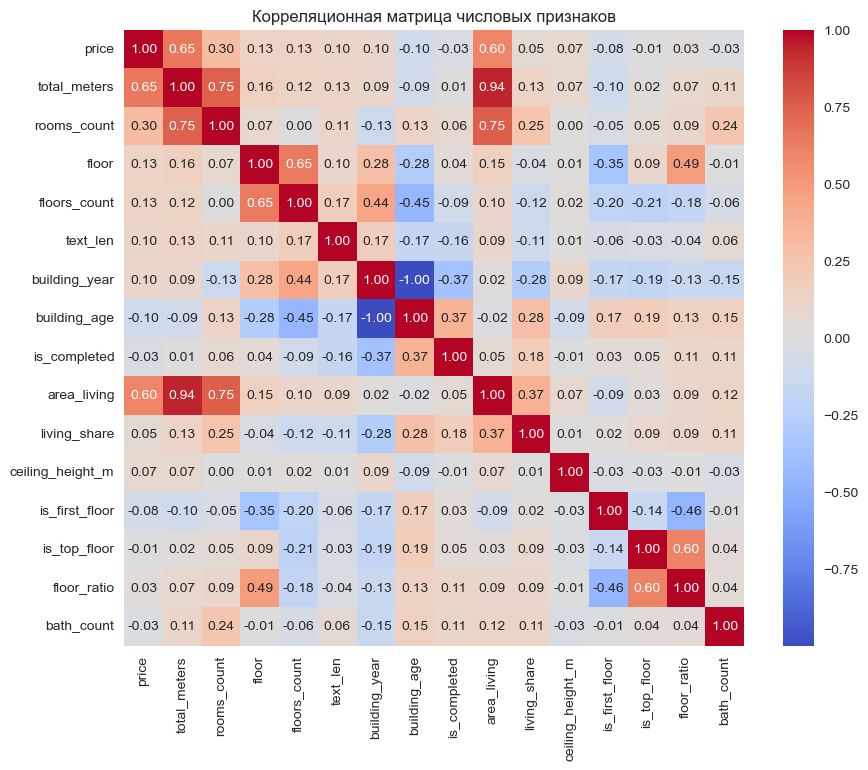

In [1866]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

Удалим признак 'area_living', так как он сильно коррелирует с общим метражем квартиры.

In [1868]:
df.drop(['area_living'], axis=1, inplace=True)

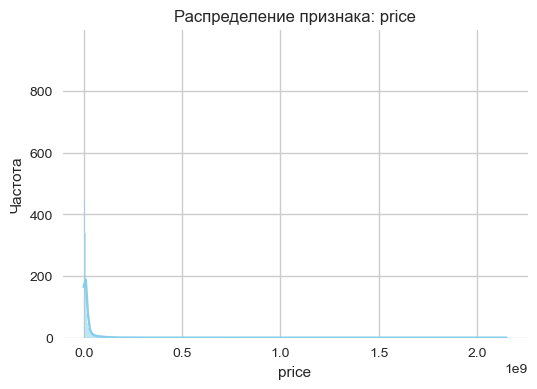

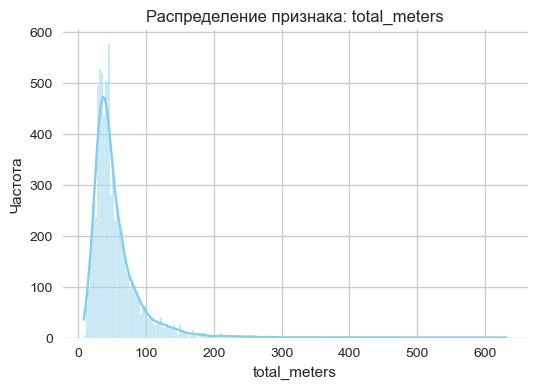

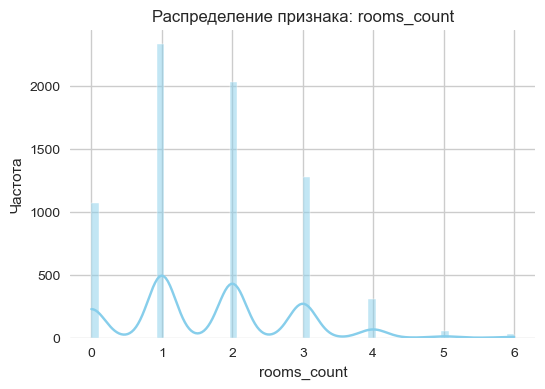

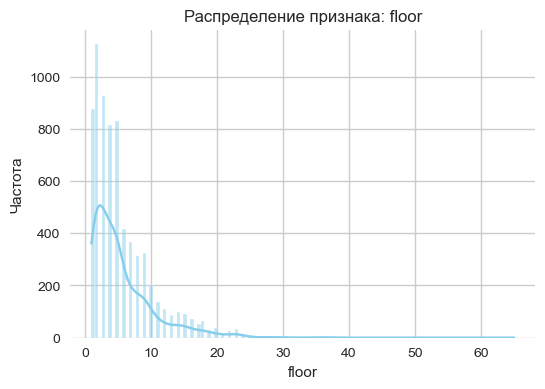

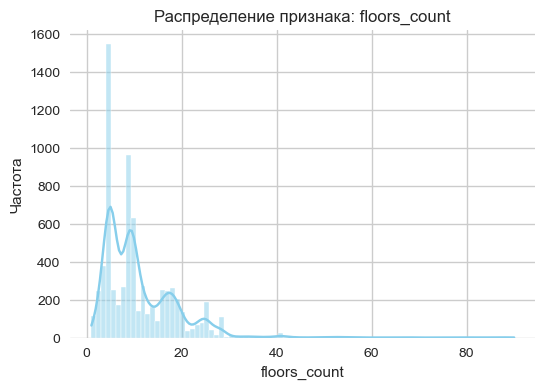

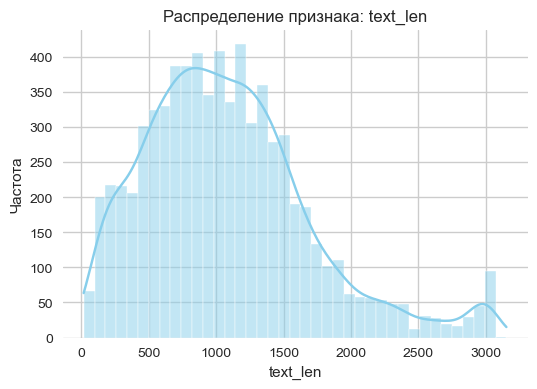

In [1869]:
for col in numeric[:6]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Распределение признака: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

Заметим, что распределение цены имеет большой хвост справа. Попробуем взять логарифм цены и посмотреть на его распределение по городам.

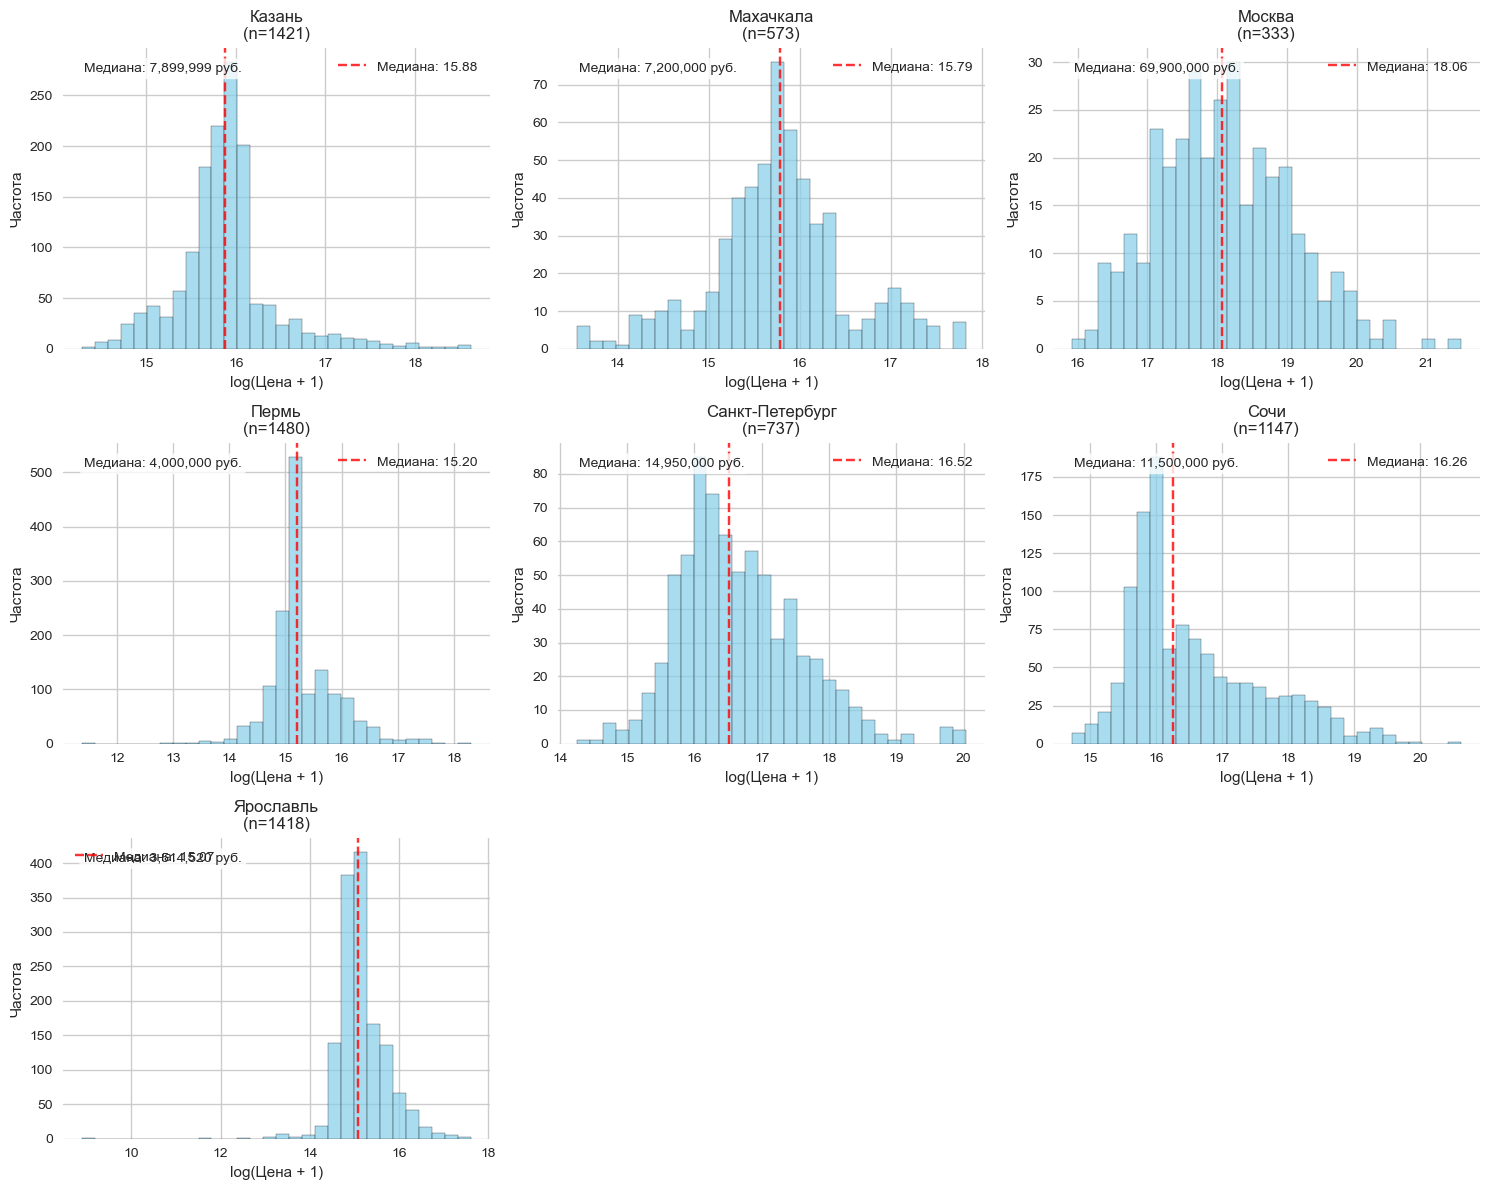

In [1871]:
# Гистограммы распределения логарифмированных цен по городам
cities = df['city'].unique()
n_cities = len(cities)

# Определяем layout для subplots
n_cols = 3
n_rows = (n_cities + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_cities > 1 else [axes]

for i, city in enumerate(cities):
    if i < len(axes):
        city_data = df[df['city'] == city]
        
        # Логарифмируем цену (log(1 + price) чтобы избежать log(0))
        log_price = np.log1p(city_data['price'])
        
        axes[i].hist(log_price, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{city}\n(n={len(city_data)})')
        axes[i].set_xlabel('log(Цена + 1)')
        axes[i].set_ylabel('Частота')
        
        # Добавляем статистику для логарифмированной цены
        median_log_price = log_price.median()
        axes[i].axvline(median_log_price, color='red', linestyle='--', alpha=0.8, 
                       label=f'Медиана: {median_log_price:.2f}')
        
        # Также показываем оригинальную медиану в заголовке или тексте
        original_median = city_data['price'].median()
        axes[i].text(0.05, 0.95, f'Медиана: {original_median:,.0f} руб.', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        axes[i].legend()

# Скрываем пустые subplots
for i in range(n_cities, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

С логарифмом распределение стало больше похоже на нормальное. Будем использовать его в качестве предсказания. 

In [1873]:
numeric = numeric.tolist()
numeric.remove('price')

In [1874]:
numeric.append('price_log')

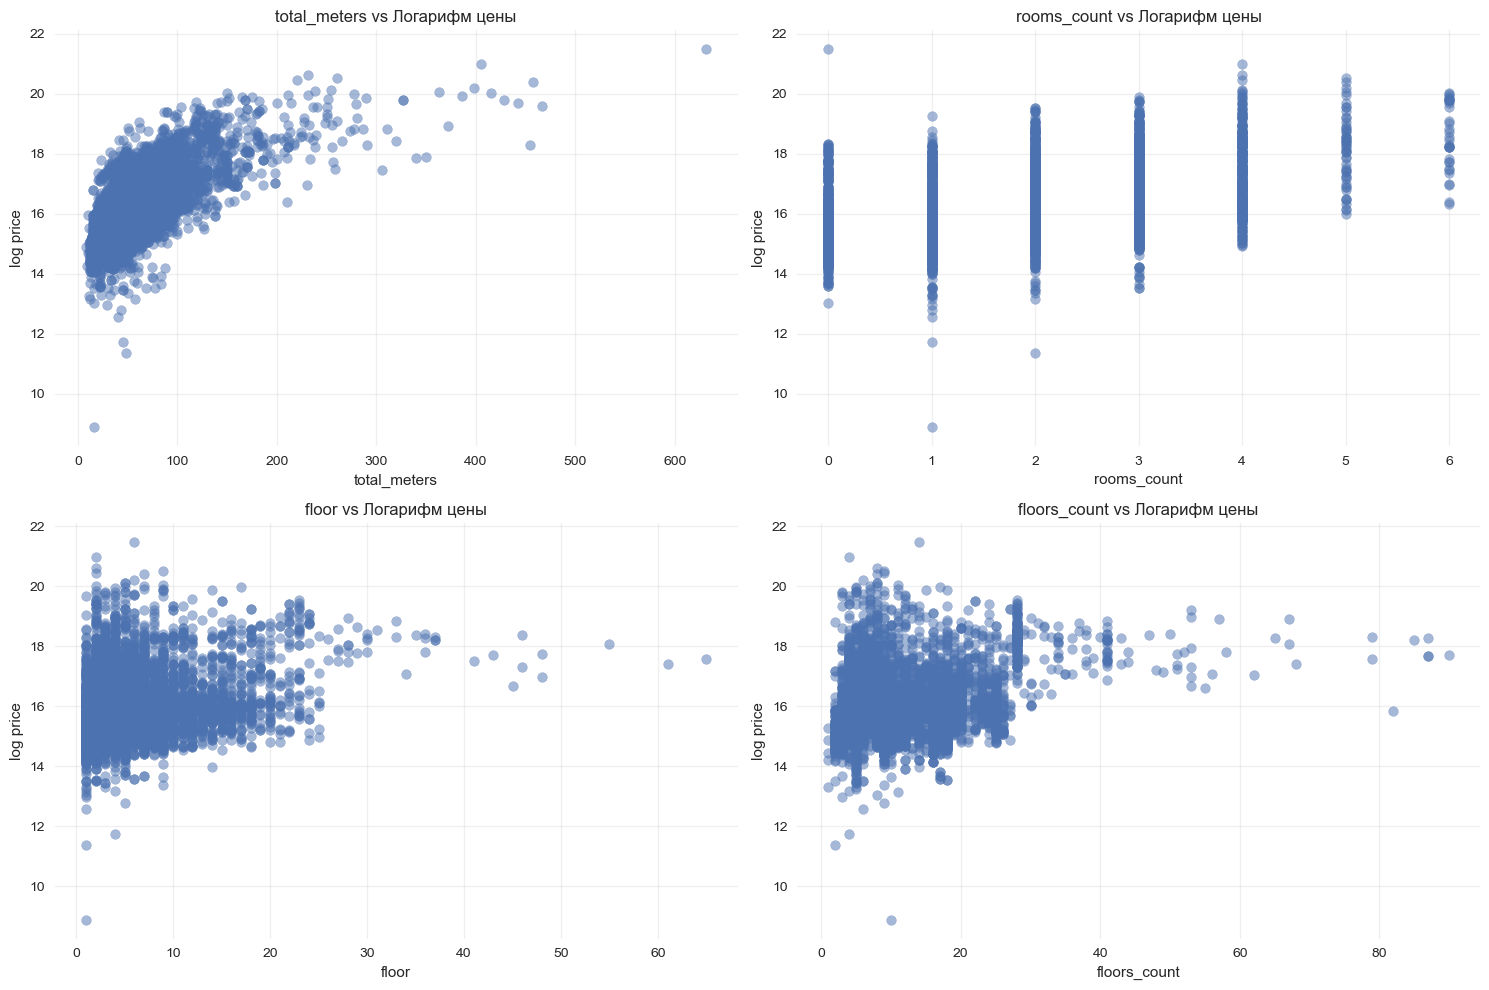

In [1875]:
top_features = numeric[:4]  # первые 4 числовых признака
df['price_log'] = np.log1p(df['price'])
n_features = len(top_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(top_features):
    if i < len(axes):
        axes[i].scatter(df[feature], df['price_log'], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('log price')
        axes[i].set_title(f'{feature} vs Логарифм цены')
        axes[i].grid(True, alpha=0.3)

# Скрываем пустые subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Можем заметить, что зависимость логарифма цены от метража напоминает корень. Попробуем построить его зависисмость от корня из total_meters и посмотреть, как она себя ведет  

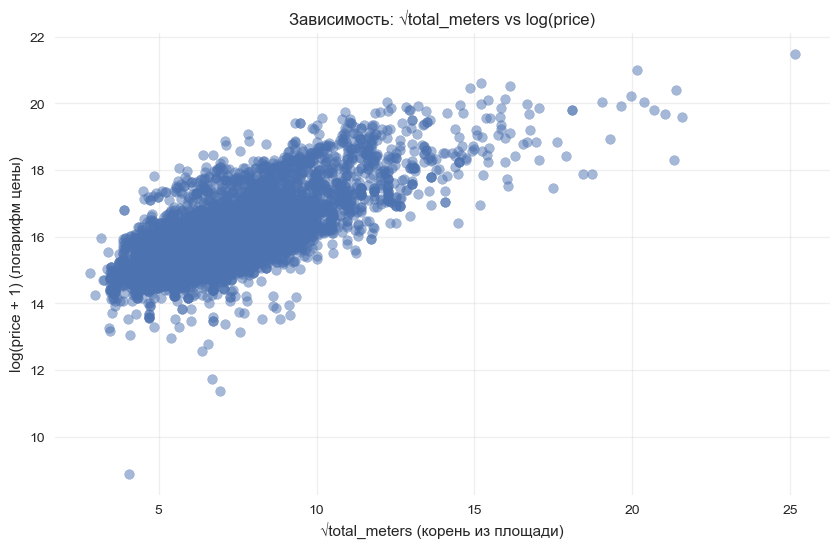

In [1877]:
df['sqrt_total_meters'] = np.sqrt(df['total_meters'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['sqrt_total_meters'], df['price_log'], alpha=0.5)
plt.xlabel('√total_meters (корень из площади)')
plt.ylabel('log(price + 1) (логарифм цены)')
plt.title('Зависимость: √total_meters vs log(price)')
plt.grid(True, alpha=0.3)
plt.show()

Это уже похоже налинейную завиимость, можно использовать корень из суммарной площади для предсказания

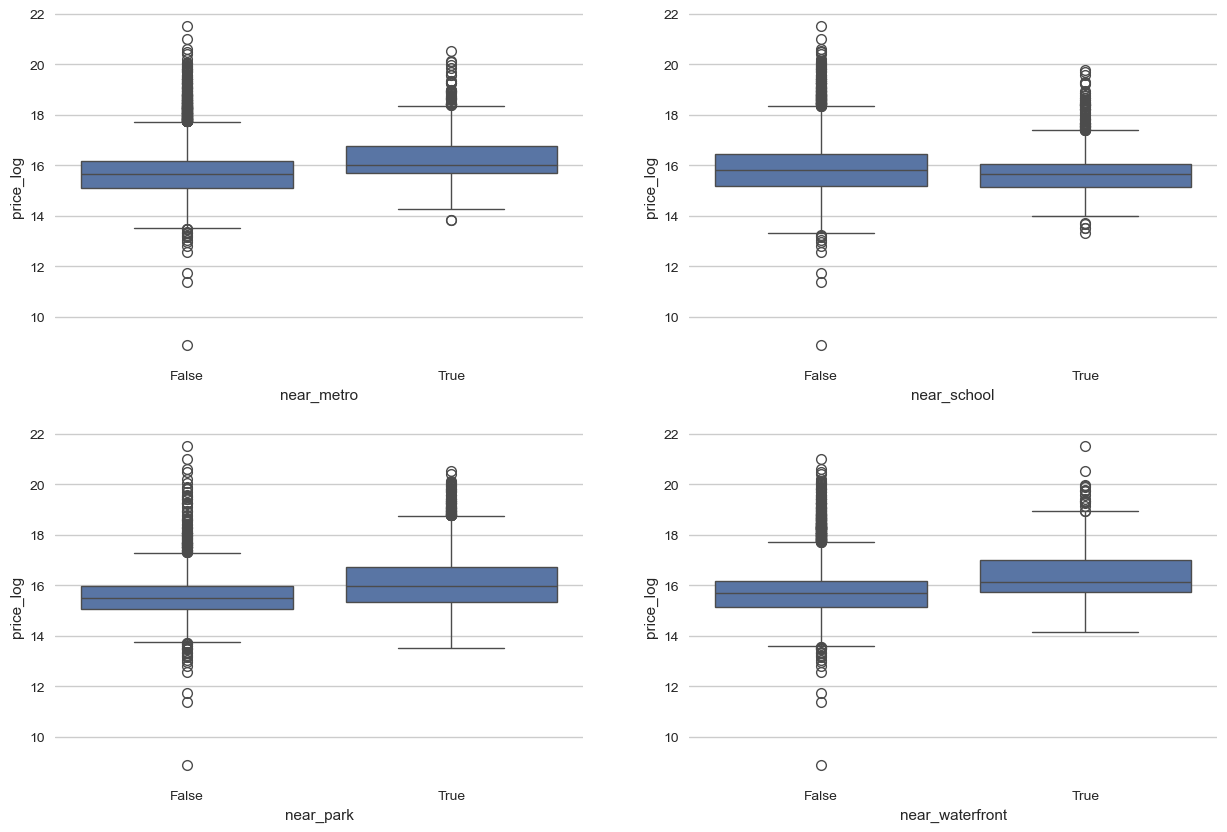

In [1879]:
# Как влияет близость к метро/школе/парку на цену
infrastructure_features = ['near_metro', 'near_school', 'near_park', 'near_waterfront']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(infrastructure_features):
    sns.boxplot(data=df, x=feature, y='price_log', ax=axes[i//2, i%2])

Можем заметить, что есть легкая положительная зависимоть с ближайщей инфраструктурой. Можем оставить данные признаки для лучшей предсказательности нашей модели

In [1881]:
# Как влияют доп признаки
premium_features = ['has_view', 'has_security', 'has_renovation', 'is_fine_finish']

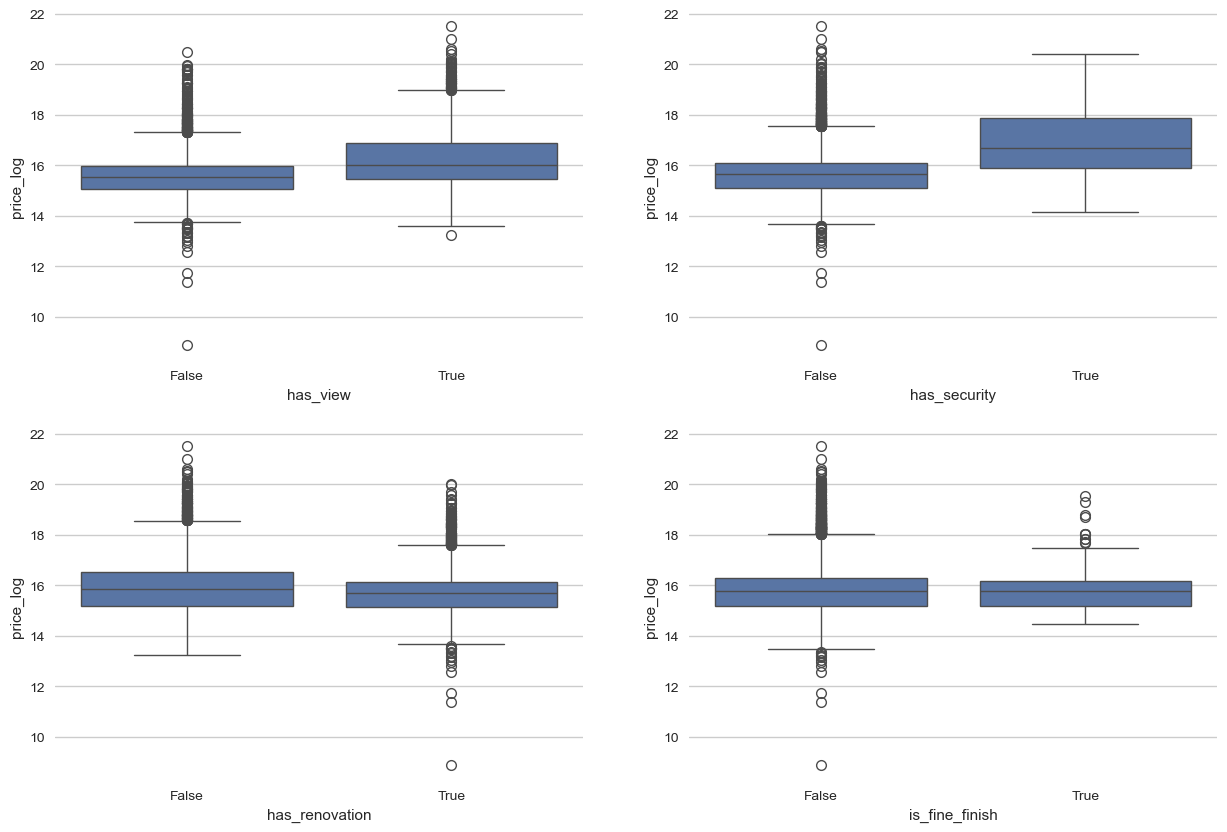

In [1882]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(premium_features):
    sns.boxplot(data=df, x=feature, y='price_log', ax=axes[i//2, i%2])

Здесь также можно заметить некую связь, поэтому считаем признаки значимыми

In [1884]:
df

,title,price,total_meters,rooms_count,floor,floors_count,city,district,description,text_len,building_year,building_age,is_completed,living_share,ceiling_height_m,is_first_floor,is_top_floor,floor_ratio,is_central,has_renovation,is_fine_finish,is_new,mat_brick,mat_monolith,mat_panel,mat_block,has_parking,has_balcony,has_furniture,bath_combined,bath_count,near_school,near_grocery,near_park,near_waterfront,near_metro,has_view,has_security,city_Казань,city_Махачкала,city_Москва,city_Пермь,city_Санкт-Петербург,city_Сочи,city_Ярославль,price_log,sqrt_total_meters
0,"1-комн. квартира, 36,7 м², 3/10 этаж",8799000.0,36.70,1.0,3,10,Казань,р-н Авиастроительный,Продается уютная 1-комнатная квартира в новом ...,1242,2023.0,2.0,1.0,0.294278,2.8,0,0,0.300000,False,True,False,False,True,True,False,False,False,True,False,True,1,False,True,True,False,True,True,False,True,False,False,False,False,False,False,15.990149,6.058052
1,"2-комн. квартира, 47 м², 8/9 этаж",7200000.0,47.00,2.0,8,9,Казань,р-н Авиастроительный,Предлагаю вашему вниманию квартиру в Авиастрои...,1598,1985.0,40.0,1.0,0.600000,2.6,0,0,0.888889,False,False,False,False,True,False,False,False,False,False,False,False,1,False,True,True,False,False,False,False,True,False,False,False,False,False,False,15.789592,6.855655
2,"1-комн. квартира, 41,24 м², 10/13 этаж",9666161.0,41.24,1.0,10,13,Казань,р-н Авиастроительный,Вы можете приобрести эту квартиру в ипотеку со...,2235,2026.0,-1.0,0.0,0.557711,2.7,0,0,0.769231,False,False,True,False,False,False,False,False,True,False,False,False,1,False,False,True,True,False,True,False,True,False,False,False,False,False,False,16.084142,6.421838
3,"2-комн. квартира, 68,57 м², 2/13 этаж",13016046.0,68.57,2.0,2,13,Казань,р-н Авиастроительный,Вы можете приобрести эту квартиру по стандартн...,2269,2026.0,-1.0,0.0,0.595012,2.7,0,0,0.153846,False,False,True,False,False,False,False,False,True,False,False,False,1,False,False,True,True,False,True,False,True,False,False,False,False,False,False,16.381694,8.280700
4,"1-комн. квартира, 23,5 м², 1/5 этаж",3300000.0,23.50,1.0,1,5,Казань,р-н Авиастроительный,Арт. 80708644 Продаётся светлая и уютная кварт...,1317,1968.0,57.0,1.0,0.659574,2.6,1,0,0.200000,False,True,False,False,True,False,False,False,False,False,False,False,1,False,False,True,False,True,False,False,True,False,False,False,False,False,False,15.009433,4.847680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,"2-комн. квартира, 53 м², 4/8 этаж",3767260.0,53.00,2.0,4,8,Ярославль,р-н Фрунзенский,Продается двухкомнатная квартира в ЖК Рассвет!...,1501,2026.0,0.0,0.0,0.528302,2.6,0,0,0.500000,False,False,False,False,False,False,False,False,False,True,False,False,2,False,True,True,True,False,True,False,False,False,False,False,False,False,True,15.141859,7.280110
7105,"1-комн. квартира, 42,4 м², 4/17 этаж",2760000.0,42.40,1.0,4,17,Ярославль,р-н Фрунзенский,В ПРOДАЖE 1-КОMНАТНAЯ КBАРТИPA В НOBOM ДOME ВО...,2109,2017.0,8.0,1.0,0.500000,2.5,0,0,0.235294,False,True,True,True,True,True,False,False,False,True,False,True,1,False,True,True,True,False,True,False,False,False,False,False,False,False,True,14.830742,6.511528
7106,"2-комн. квартира, 44,1 м², 2/5 этаж",3780000.0,44.10,2.0,2,5,Ярославль,р-н Фрунзенский,Продаётся теплая 2-комнатная квартира на самом...,1468,1973.0,52.0,1.0,0.750567,2.5,0,0,0.400000,False,True,False,False,True,False,False,False,False,True,True,True,1,True,True,True,True,False,True,False,False,False,False,False,False,False,True,15.145235,6.640783
7107,"2-комн. квартира, 41 м², 3/10 этаж",3400000.0,41.00,2.0,3,10,Ярославль,р-н Фрунзенский,Продается уютная двухкомнатная квартира общей ...,1076,1973.0,52.0,1.0,0.731707,2.5,0,0,0.300000,False,True,False,False,True,False,False,False,False,False,False,False,2,False,True,True,False,False,False,False,False,False,False,False,False,False,True,15.039286,6.403124


Теперь избавимся от признаков, которые не требуются для нашего анализа и информацию из которых мы перекодировали в другие данные. 

In [1886]:
df.drop(['title', 'city', 'description', 'district', 'total_meters'], axis=1, inplace=True)


## 6. Краткие выводы

- Проверены пропуски и общая структура данных.  
- Получена описательная статистика.  
- Проанализированы корреляции и распределения числовых признаков.  
- Построены базовые визуализации.  


In [1888]:
df.to_csv('cian_processed_data.csv', index=False, encoding='utf-8-sig')
print("Файл 'cian_processed_data.csv' сохранен!")

Файл 'cian_processed_data.csv' сохранен!
